# 線形回帰

教師あり機械学習の基礎となる回帰について学びます。
ボストン住宅価格という有名問題




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import 
try:
    import japanize_matplotlib #日本語化 matplotlib 
    sns.set(font="IPAexGothic") #日本語フォント設定
except ModuleNotFoundError:
    pass

## 機械学習






## ボストンハウジング価格


In [4]:
data = pd.read_csv('boston.csv')
data.head() # 最初の５行を表示

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


```
CRIM	人口1人当たりの犯罪発生数
ZN	25000平方フィート以上の居住区間の占める割合
INDUS	小売業以外の商業が占める面積の割合
CHAS	チャールズ川によるダミー変数（1：川の周辺，0：それ以外）
NOX	NOxの濃度
RM	住居の平均部屋数
AGE	1940年より前に建てられた物件の割合
DIS	5つのボストン市の雇用施設からの距離
RAD	環状高速道路へのアクセスのしやすさ
TAX	＄10,000ドルあたりの不動産税率の総計
PTRATIO	町毎の児童と教師の比率
B	町毎の黒人（Bk）の比率を次式で表したもの。1000(Bk-0.63)^2
LSTAT	給与の低い職業に従事する人口の割合
MEDV	所有者が占有している家屋の＄1000単位の中央値
```

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

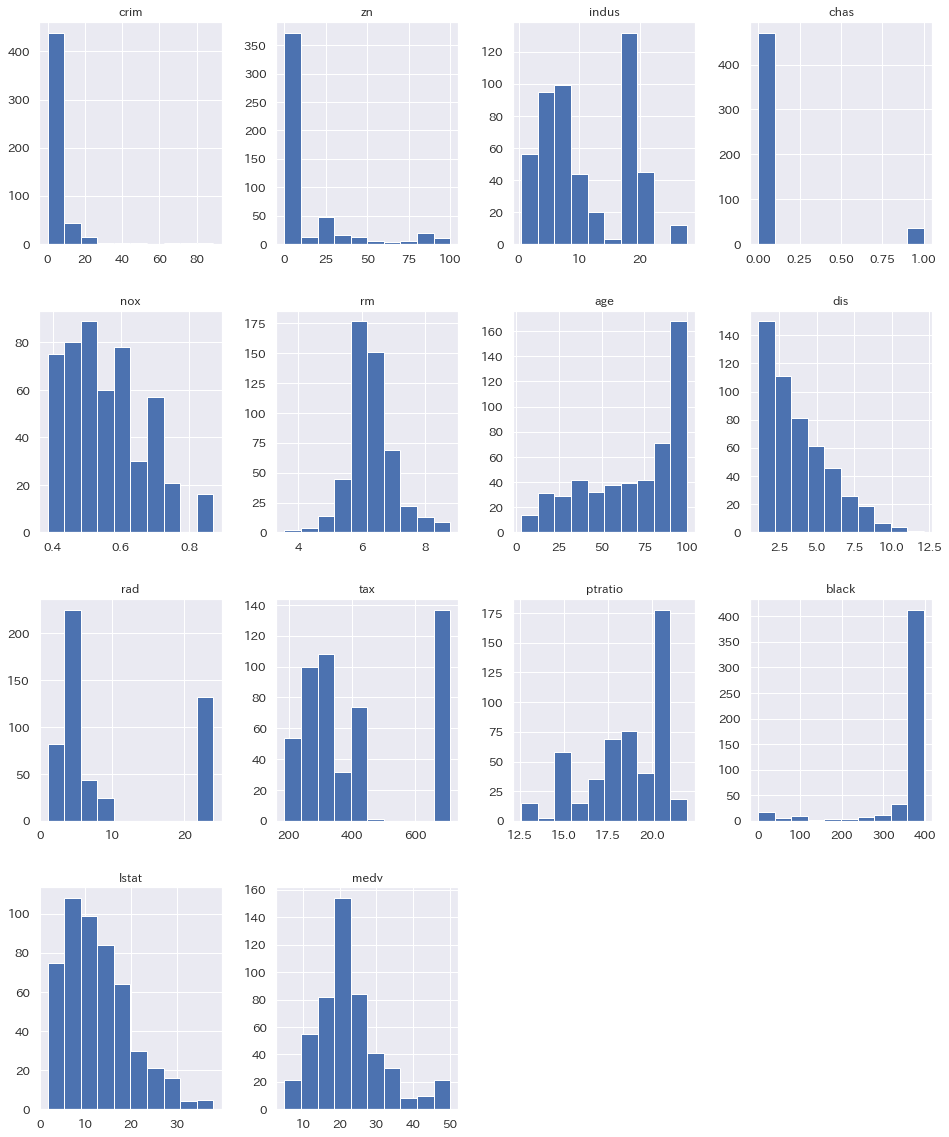

In [8]:
data.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12)

<AxesSubplot:>

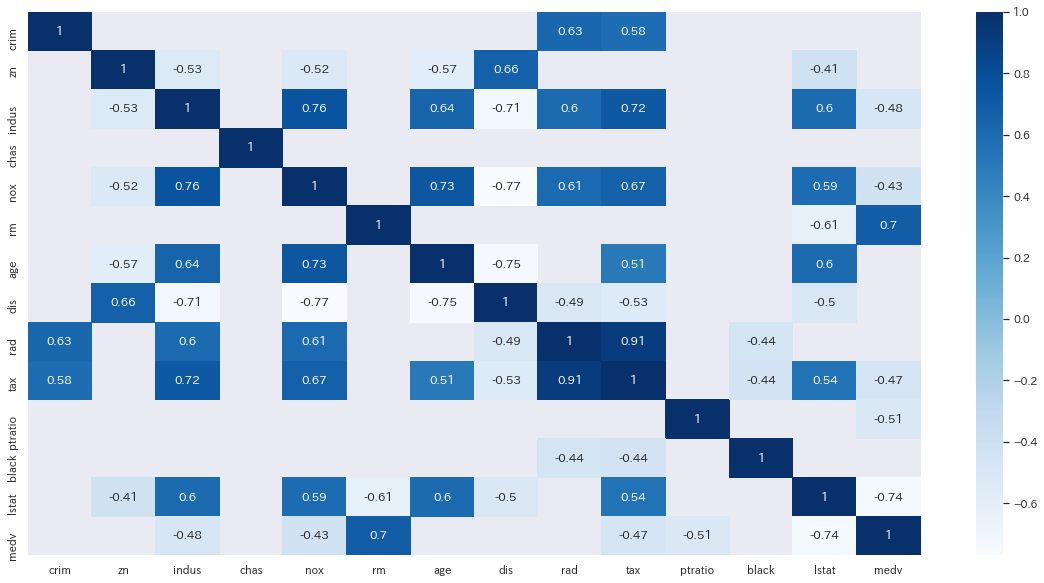

In [9]:
cor=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],annot=True,cmap='Blues')

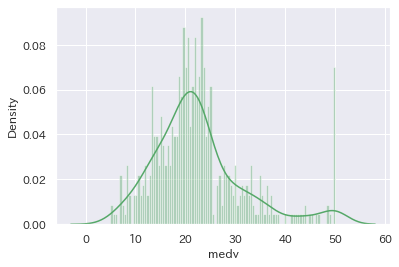

In [6]:
sns.distplot(data['medv'], color='g', bins=100, hist_kws={'alpha': 0.4});

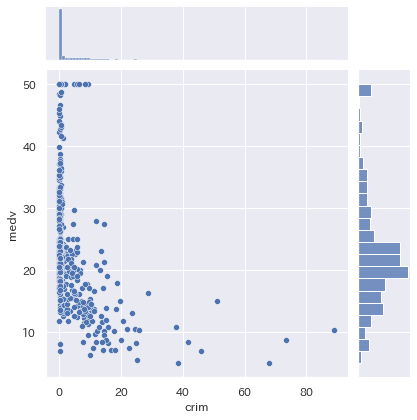

In [27]:
sns.jointplot(x="crim",y="medv",data=data)

<AxesSubplot:xlabel='nox', ylabel='lstat'>

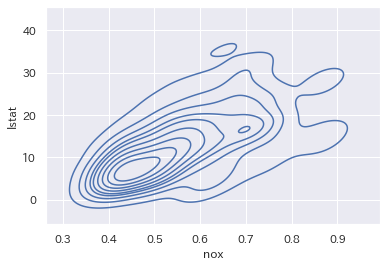

In [29]:
sns.kdeplot(data["nox"], data["lstat"])

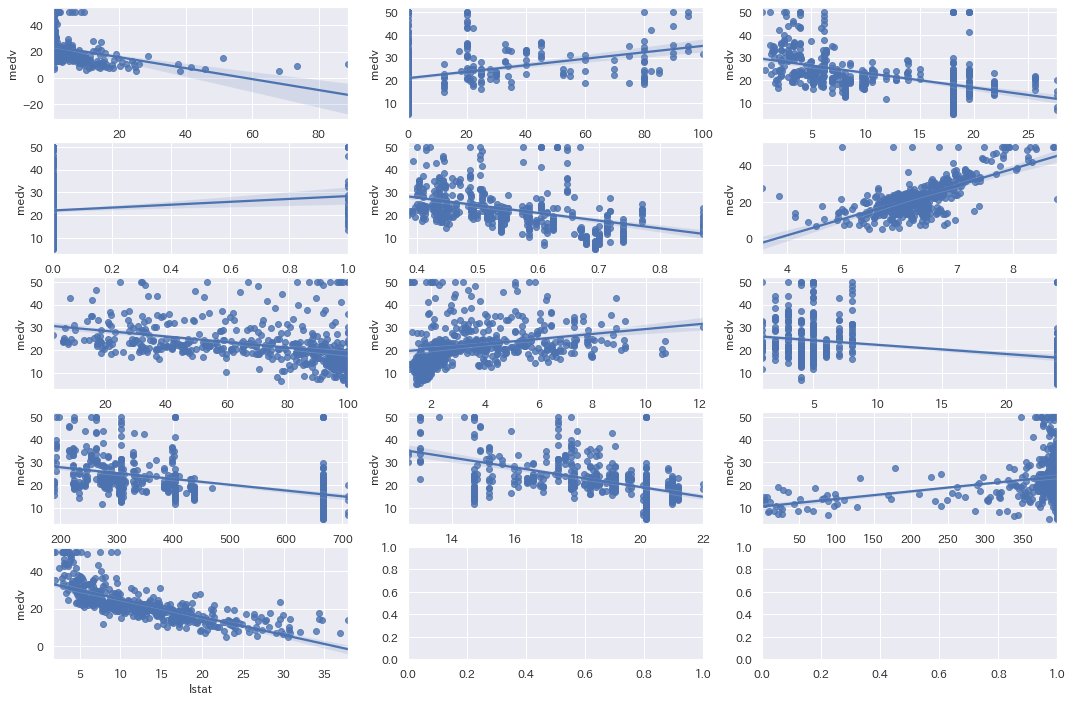

In [13]:
fig, ax = plt.subplots(round(len(data.columns) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns) - 1:
        sns.regplot(x=data.columns[i],y='medv',data=data[data.columns], ax=ax)

##教師データ

In [14]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
y = data['medv']
X = data.drop('medv', axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
errs = pd.DataFrame({'正解': y_test, '予測値':y_pred})
errs

,正解,予測値
301,22.0,28.925114
372,50.0,23.877012
444,10.8,11.888456
16,23.1,20.757595
13,20.4,19.536171
...,...,...
316,17.8,17.777909
280,45.4,38.953192
43,24.7,25.012380
151,19.6,18.175275


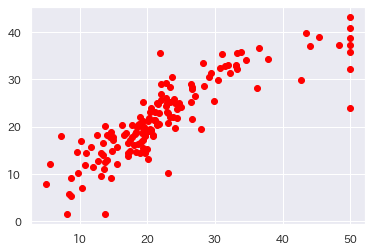

In [24]:
plt.scatter(y_test, y_pred, c = 'red') 

In [25]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  26.03503513756105


In [26]:
from sklearn.metrics import r2_score
print('R squared error', r2_score(y_test, y_pred))

R squared error 0.7325735700584157


R2乗

応答変数の変動のうち、どれぐらいの割合がモデルの効果によって説明されるかを表します。R2乗は決定係数、寄与率ともいい、分散分析表の値を使って次のように計算されます。

R2乗が1に近いほど、モデルのデータへのあてはまりが良いことを示します。R2乗がほぼ0である場合、回帰モデルによる予測は、応答変数の単なる平均による予測とほぼ同じであることを意味します。

自由度調整R2乗

「自由度調整済みR2乗」、「自由度調整済み決定係数」などと呼ばれている指標であり、R2乗をモデルのパラメータ数で調整した指標です。自由度調整済みR2乗は、パラメータ数の異なるモデルを比較するのに役立ちます。

```
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2
```

https://www.kaggle.com/emilytries/regression-algorithm-approaches-in-boston-dataset
https://hinomaruc.hatenablog.com/entry/2019/11/15/223628

## ランダムフォレスト


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train) 


RandomForestRegressor()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 
print('R squared error', r2_score(y_test, y_pred))



Mean Square Error :  11.957199348684199
R squared error 0.8771781517857399


## XgBoost

勾配ブーストを用いた決定木(GBDT)によるクラス分類や回帰はデータ分析コンペでも非常によく使われています。

https://arxiv.org/abs/1603.02754

その中でも2016年に出されたXGBoostはLightGBMと並びよく使われている手法です。
性能が良いことで有名なXGBoost, LightGBMですが、モデル内部でどのような処理が行われているかよくわかっていなかったので論文を読んでみました。


In [38]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

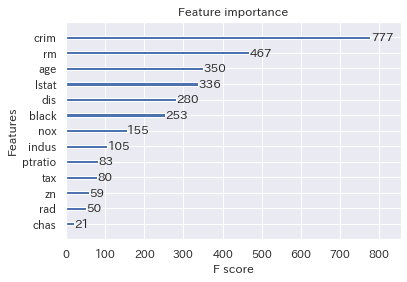

In [33]:
xgb.plot_importance(model)

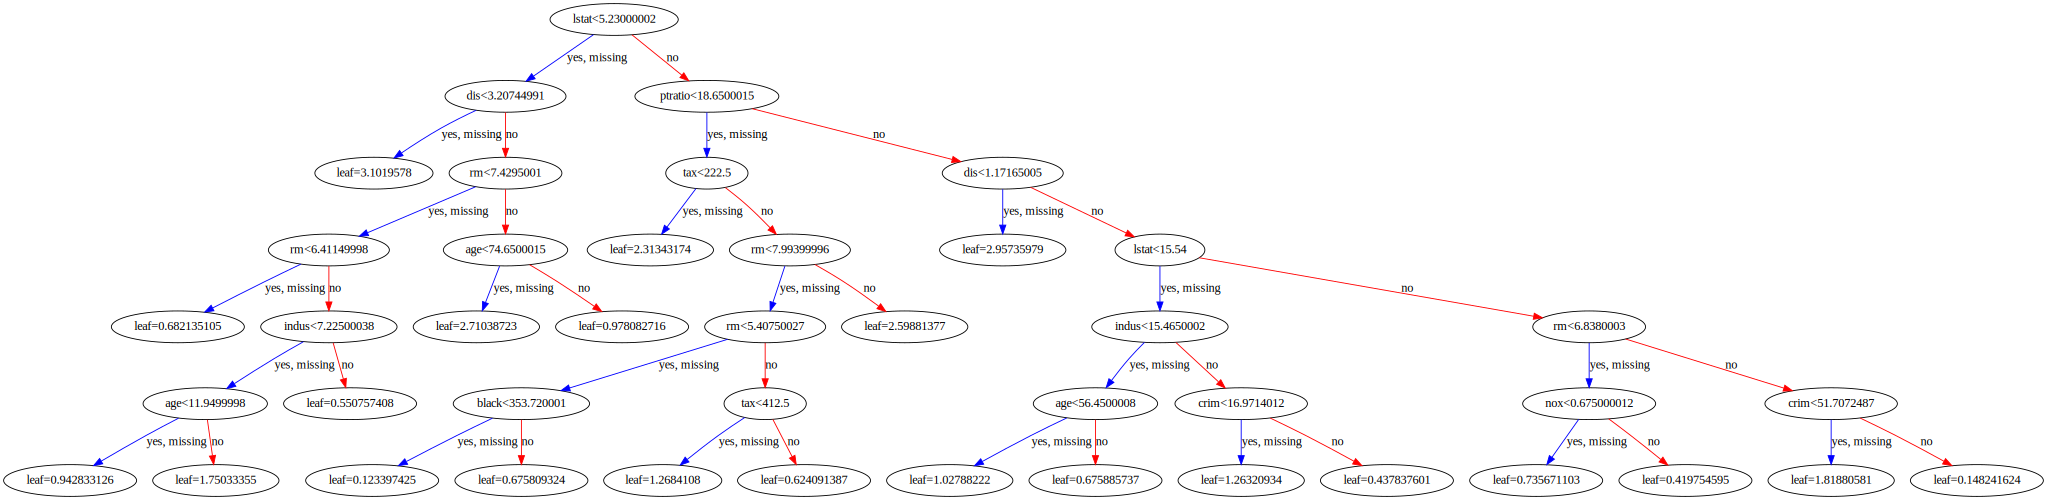

In [40]:
xgb.to_graphviz(model, num_trees=5)

In [39]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 
print('R squared error', r2_score(y_test, y_pred))


Mean Square Error :  12.834071382104794
R squared error 0.8681711058503583


## コースワーク

<div class="alert alert-info">

Let's try

`2 ** (1//2)` が、正しく $\sqrt{2}$ にならない理由を考えてみよう

</div>

<div class="alert alert-warning">

(プログラミングの)$N$個数える

プログラミングでは、原則、「**0から**$N-1$まで」のように数えます。

</div>

### 平均点

<div class="admonition tip">

**例題（平均点）**

期末試験は5人受験した。
点数が40点未満の生徒は全員，補習を受け，成績が40点になった。
5人の平均点を求めよ。

入力例：
```
10
65
100
30
95
```

出力例：
```
68
```

[AtCoder (JOI2014 予選)](https://atcoder.jp/contests/joi2014yo/tasks/joi2014yo_a)

</div>

__(解法) リストを使う場合__

1. 期末試験を記録する空の得点リスト `scores` を用意する
2. 5人分繰り返し、点数を読んで、`scores` に追加する 
3. 平均点は `sum(scores) // 5`
